Getting SEC data and saving the list of companies to a csv file

In [ ]:
import requests
import json
import pandas as pd
from google.colab import files

# Proper SEC API URL for insider trading data
url = "https://www.sec.gov/files/company_tickers.json"

# Add headers to avoid being blocked
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)",
    "Accept": "application/json"
}

try:
    response = requests.get(url, headers=headers, timeout=10)

    # Check if the response is valid
    if response.status_code == 200:
        data = response.json()  # Convert to JSON

        df = pd.DataFrame.from_dict(data, orient="index")

        df.columns = ["CIK", "Ticker", "Company Name"]

        csv_filename = "sec_company_tickers.csv"
        df.to_csv(csv_filename, index=False)
        print(f"File saved as {csv_filename}")

        files.download(csv_filename)

    else:
        print(f"Error: {response.status_code}, Response: {response.text}")

except requests.exceptions.RequestException as e:
    print(f"Network error: {e}")


File saved as sec_company_tickers.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Accessing the list of SEC companies approx 50 for analysis and getting their real time stock data in Yahoo Finance

In [ ]:
import requests
import json
import pandas as pd
import yfinance as yf
from google.colab import files

uploaded = files.upload()

csv_filename = list(uploaded.keys())[0]

df_sec = pd.read_csv(csv_filename)

if "Ticker" not in df_sec.columns:
    raise ValueError("Error: The uploaded CSV does not contain a 'Ticker' column.")

tickers = df_sec["Ticker"].dropna().unique().tolist()
tickers = tickers[:30]

print(f"Fetching data for {len(tickers)} tickers...")

start_date = "2022-09-01"
end_date = "2024-03-01"

stock_data = yf.download(tickers, start=start_date, end=end_date, group_by="ticker")

required_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
missing_columns = [col for col in required_columns if col not in stock_data.columns]

if missing_columns:
    print(f"Warning: Missing columns in the downloaded data: {missing_columns}")
else:
    print("All required columns are present.")

stock_csv_filename = "yahoo_stock_data_1_5_years.csv"
stock_data.to_csv(stock_csv_filename)
print(f"Stock data saved as {stock_csv_filename}")

files.download(stock_csv_filename)

Saving sec_company_tickers.csv to sec_company_tickers.csv
Fetching data for 30 tickers...
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  30 of 30 completed


Stock data saved as yahoo_stock_data_1_5_years.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Preprocessing

In [ ]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

csv_filename = list(uploaded.keys())[0]
df = pd.read_csv(csv_filename, header=[0, 1], index_col=0, parse_dates=True)

df_long = df.stack(level=0).reset_index()
df_long.columns = ["Date", "Ticker", "Open", "High", "Low", "Close", "Volume"]

output_filename = "stocks_long_format_1_5.csv"
df_long.to_csv(output_filename, index=False)

print(f"Data converted and saved as {output_filename}")

files.download(output_filename)


Saving yahoo_stock_data_1_5_years.csv to yahoo_stock_data_1_5_years (1).csv
✅ Data converted and saved as stocks_long_format_1_5.csv


<ipython-input-2-9854893f2ddc>:12: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_long = df.stack(level=0).reset_index()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

csv_filename = list(uploaded.keys())[0]
df = pd.read_csv(csv_filename, parse_dates=["Date"])

df.sort_values(["Ticker", "Date"], inplace=True)

# ---- Daily Returns Calculation (Using 'Close' Price) ---- #
df["Daily Return"] = df.groupby("Ticker")["Close"].pct_change()
daily_returns_csv = "daily_returns_long_1_5.csv"
df[["Date", "Ticker", "Daily Return"]].dropna().to_csv(daily_returns_csv, index=False)
print(f"Daily Returns saved as {daily_returns_csv}")
files.download(daily_returns_csv)

# ---- Moving Averages (7-day & 30-day) ---- #
df["MA_7"] = df.groupby("Ticker")["Close"].rolling(window=7).mean().reset_index(level=0, drop=True)
df["MA_30"] = df.groupby("Ticker")["Close"].rolling(window=30).mean().reset_index(level=0, drop=True)

ma_csv = "moving_averages_long_1_5.csv"
df[["Date", "Ticker", "MA_7", "MA_30"]].dropna().to_csv(ma_csv, index=False)
print(f"Moving Averages saved as {ma_csv}")
files.download(ma_csv)

# ---- Stock Volatility (Standard Deviation of Returns) ---- #
df["Volatility_7"] = df.groupby("Ticker")["Daily Return"].rolling(window=7).std().reset_index(level=0, drop=True)
df["Volatility_30"] = df.groupby("Ticker")["Daily Return"].rolling(window=30).std().reset_index(level=0, drop=True)

volatility_csv = "stock_volatility_long_1_5.csv"
df[["Date", "Ticker", "Volatility_7", "Volatility_30"]].dropna().to_csv(volatility_csv, index=False)
print(f"Stock Volatility saved as {volatility_csv}")
files.download(volatility_csv)



Saving stocks_long_format_1_5.csv to stocks_long_format_1_5 (1).csv
✅ Daily Returns saved as daily_returns_long_1_5.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Moving Averages saved as moving_averages_long_1_5.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Stock Volatility saved as stock_volatility_long_1_5.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

csv_filename = list(uploaded.keys())[0]
df = pd.read_csv(csv_filename, parse_dates=["Date"])

df.sort_values(["Ticker", "Date", "Volume"], inplace=True)


df["Daily Return"] = df.groupby("Ticker")["Close"].pct_change()
df["Volatility_7"] = df.groupby("Ticker")["Daily Return"].rolling(window=7).std().reset_index(level=0, drop=True)
df["Volatility_30"] = df.groupby("Ticker")["Daily Return"].rolling(window=30).std().reset_index(level=0, drop=True)

# volatility_csv = "stock_volatility_long_1_5_1.csv"
# df[["Date", "Ticker", "Volatility_7", "Volatility_30", "Volume"]].dropna().to_csv(volatility_csv, index=False)
# print(f"Stock Volatility saved as {volatility_csv}")
# files.download(volatility_csv)


Saving stocks_long_format_1_5.csv to stocks_long_format_1_5 (6).csv


In [ ]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

csv_filename = list(uploaded.keys())[0]
df = pd.read_csv(csv_filename, parse_dates=["Date"])

df.sort_values(["Ticker", "Date"], inplace=True)

# Function to compute RSI
def compute_rsi(series, window=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate RSI
df["RSI_14"] = df.groupby("Ticker")["Close"].apply(compute_rsi).reset_index(level=0, drop=True)

rsi_csv = "rsi_14_long_1_5.csv"
df[["Date", "Ticker", "RSI_14", "Volume"]].dropna().to_csv(rsi_csv, index=False)
print(f"RSI (14-day) with Volume saved as {rsi_csv}")
files.download(rsi_csv)


Saving stocks_long_format_1_5.csv to stocks_long_format_1_5 (7).csv
✅ RSI (14-day) with Volume saved as rsi_14_long_1_5.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ---- Relative Strength Index (RSI - 14 days) ---- #
def compute_rsi(series, window=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df["RSI_14"] = df.groupby("Ticker")["Close"].apply(compute_rsi).reset_index(level=0, drop=True)

rsi_csv = "rsi_14_long_1_5.csv"
df[["Date", "Ticker", "RSI_14"]].dropna().to_csv(rsi_csv, index=False)
print(f"RSI (14-day) saved as {rsi_csv}")
files.download(rsi_csv)

# ---- Exponential Moving Average (EMA 7-day & 30-day) ---- #
df["EMA_7"] = df.groupby("Ticker")["Close"].transform(lambda x: x.ewm(span=7, adjust=False).mean())
df["EMA_30"] = df.groupby("Ticker")["Close"].transform(lambda x: x.ewm(span=30, adjust=False).mean())

ema_csv = "ema_long_1_5.csv"
df[["Date", "Ticker", "EMA_7", "EMA_30"]].dropna().to_csv(ema_csv, index=False)
print(f"Exponential Moving Averages saved as {ema_csv}")
files.download(ema_csv)


✅ RSI (14-day) saved as rsi_14_long_1_5.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Exponential Moving Averages saved as ema_long_1_5.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

csv_filename = list(uploaded.keys())[0]
df = pd.read_csv(csv_filename, parse_dates=["Date"])

df.sort_values(["Ticker", "Date"], inplace=True)

# ---- MACD (Moving Average Convergence Divergence) ---- #
df["MACD"] = df.groupby("Ticker")["Close"].transform(lambda x: x.ewm(span=12, adjust=False).mean()) - df.groupby("Ticker")["Close"].transform(lambda x: x.ewm(span=26, adjust=False).mean())
df["MACD_Signal"] = df.groupby("Ticker")["MACD"].transform(lambda x: x.ewm(span=9, adjust=False).mean())

macd_csv = "macd_long_1_5.csv"
df[["Date", "Ticker", "MACD", "MACD_Signal"]].dropna().to_csv(macd_csv, index=False)
print(f"MACD & Signal Line saved as {macd_csv}")
files.download(macd_csv)


Saving stocks_long_format_1_5.csv to stocks_long_format_1_5 (3).csv
✅ MACD & Signal Line saved as macd_long_1_5.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

csv_filename = list(uploaded.keys())[0]

df = pd.read_csv(csv_filename, dtype=str)

xlsx_filename = csv_filename.replace(".csv", ".xlsx")

df.to_excel(xlsx_filename, index=False, engine="openpyxl")

files.download(xlsx_filename)

print(f"File successfully converted and saved as {xlsx_filename}")


Saving stock_volatility_long_1_5_1.csv to stock_volatility_long_1_5_1 (1).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ File successfully converted and saved as stock_volatility_long_1_5_1 (1).xlsx


## EDA
#### Stock Price Trends Over Time (Top 10 Stocks)

Saving stocks_long_format_1_5.csv to stocks_long_format_1_5 (5).csv


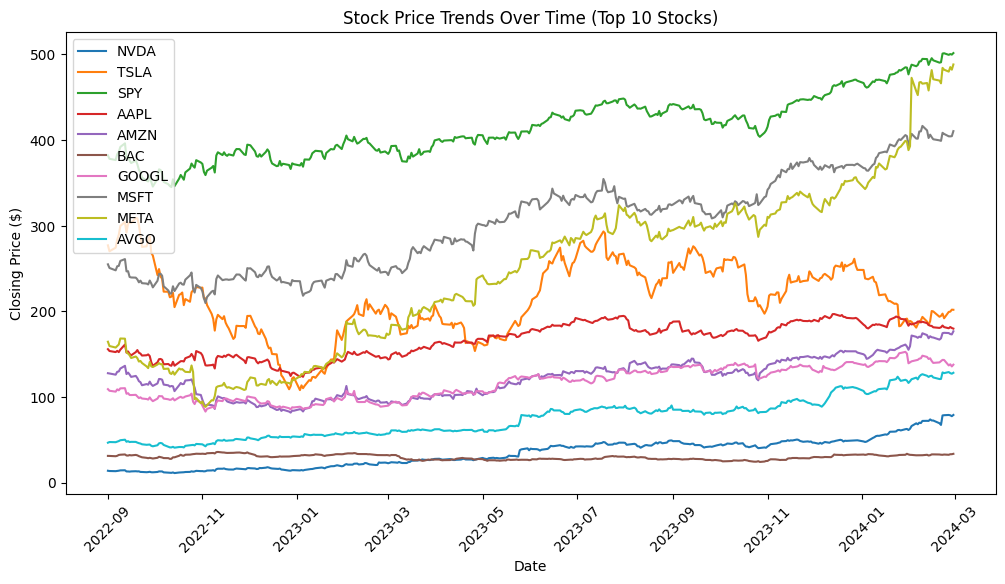

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import files

uploaded = files.upload()

csv_filename = list(uploaded.keys())[0]
df = pd.read_csv(csv_filename, parse_dates=["Date"])

top_tickers = df.groupby("Ticker")["Volume"].sum().nlargest(10).index.tolist()

plt.figure(figsize=(12, 6))
for ticker in top_tickers:
    subset = df[df["Ticker"] == ticker]
    plt.plot(subset["Date"], subset["Close"], label=ticker)

plt.xlabel("Date")
plt.ylabel("Closing Price ($)")
plt.title("Stock Price Trends Over Time (Top 10 Stocks)")
plt.legend()
plt.xticks(rotation=45)
plt.show()


Extracting the file for Tableau implementation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import files

uploaded = files.upload()

csv_filename = list(uploaded.keys())[0]
df = pd.read_csv(csv_filename, parse_dates=["Date"])

top_tickers = df.groupby("Ticker")["Volume"].sum().nlargest(10).index.tolist()

top_df = df[df["Ticker"].isin(top_tickers)][["Date", "Ticker", "Close", "Volume"]]

top_df.to_excel("top10_stock_prices.xlsx", index=False)

files.download("top10_stock_prices.xlsx")


Saving stocks_long_format_1_5.csv to stocks_long_format_1_5.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Stock Volatility Comparison (Box Plot)

Saving stock_volatility_long_1_5.csv to stock_volatility_long_1_5 (2).csv


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


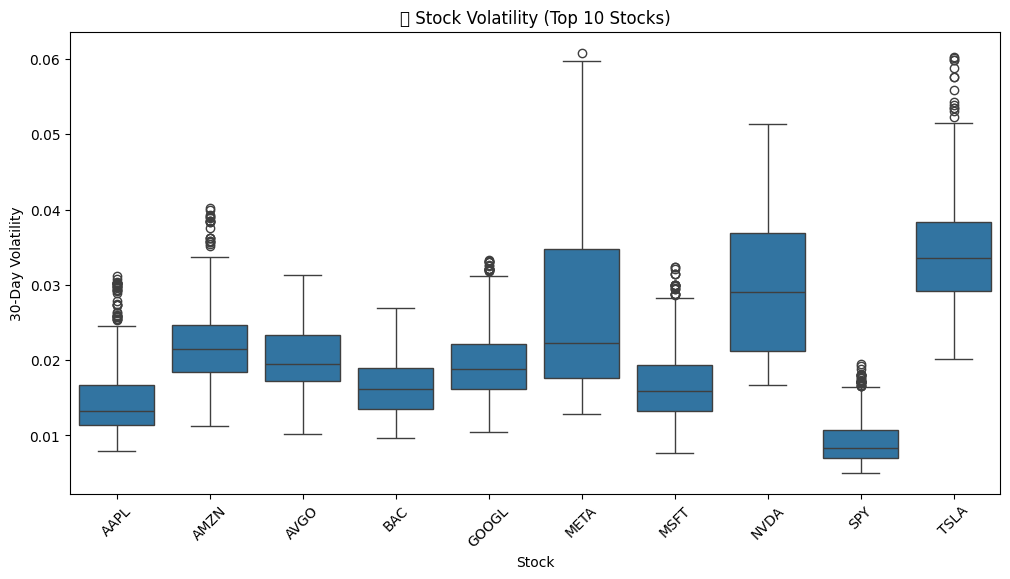

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import files

uploaded = files.upload()

csv_filename = list(uploaded.keys())[0]
df = pd.read_csv(csv_filename, parse_dates=["Date"])

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df["Ticker"].isin(top_tickers)], x="Ticker", y="Volatility_30")
plt.xlabel("Stock")
plt.ylabel("30-Day Volatility")
plt.title("Stock Volatility (Top 10 Stocks)")
plt.xticks(rotation=45)
plt.show()

Extracting the file for Tableau implementation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import files

uploaded = files.upload()

csv_filename = list(uploaded.keys())[0]
df = pd.read_csv(csv_filename, parse_dates=["Date"])

top_tickers = df.groupby("Ticker")["Volume"].sum().nlargest(10).index.tolist()

vol_df = df[df["Ticker"].isin(top_tickers)][["Date", "Ticker", "Volatility_30", "Volume"]]

vol_df.to_excel("top10_stock_volatility.xlsx", index=False)

files.download("top10_stock_volatility.xlsx")


Saving stock_volatility_long_1_5_1.csv to stock_volatility_long_1_5_1 (2).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Correlation Between Stocks (Heatmap)

Saving stocks_long_format_1_5.csv to stocks_long_format_1_5 (7).csv


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


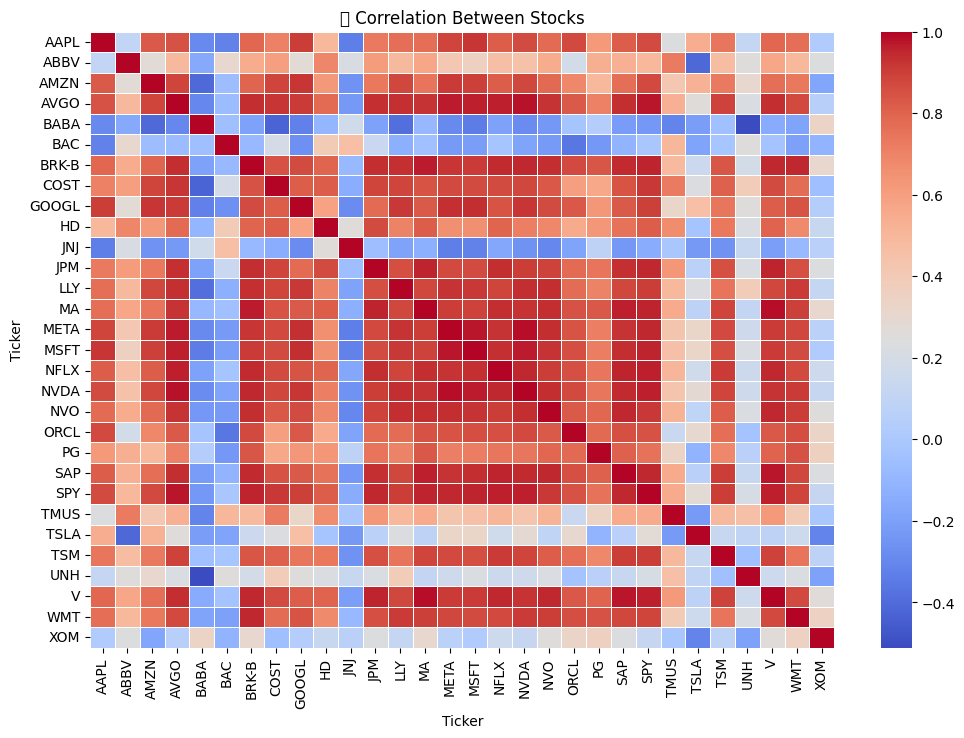

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

uploaded = files.upload()

csv_filename = list(uploaded.keys())[0]
df = pd.read_csv(csv_filename, parse_dates=["Date"])

pivot_df = df.pivot(index="Date", columns="Ticker", values="Close")
corr_matrix = pivot_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("🔗 Correlation Between Stocks")
plt.show()


#### Unusual Trading Volume Detection

Saving stocks_long_format_1_5.csv to stocks_long_format_1_5 (8).csv


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


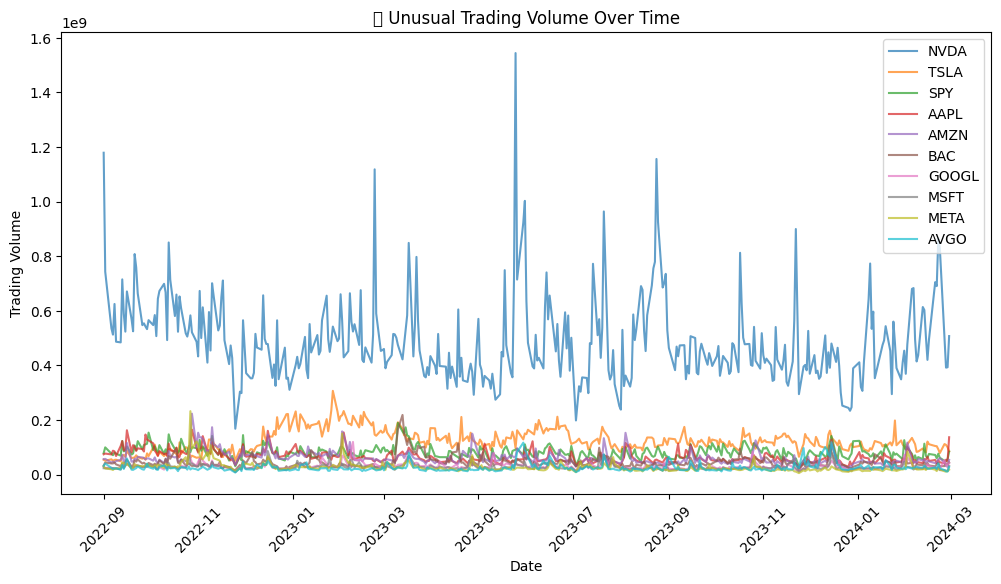

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files

uploaded = files.upload()

csv_filename = list(uploaded.keys())[0]
df = pd.read_csv(csv_filename, parse_dates=["Date"])


plt.figure(figsize=(12, 6))
for ticker in top_tickers:
    subset = df[df["Ticker"] == ticker]
    plt.plot(subset["Date"], subset["Volume"], label=ticker, alpha=0.7)

plt.xlabel("Date")
plt.ylabel("Trading Volume")
plt.title("Unusual Trading Volume Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.show()


Extracting the file for Tableau implementation

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt

uploaded = files.upload()

csv_filename = list(uploaded.keys())[0]
df = pd.read_csv(csv_filename, parse_dates=["Date"])

top_tickers = df.groupby("Ticker")["Volume"].sum().nlargest(10).index.tolist()

volume_df = df[df["Ticker"].isin(top_tickers)][["Date", "Ticker", "Volume"]]

volume_df.to_excel("top10_trading_volume.xlsx", index=False)

files.download("top10_trading_volume.xlsx")


Saving stocks_long_format_1_5.csv to stocks_long_format_1_5 (4).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### RSI Trend Analysis for Overbought/Oversold Stocks

Saving rsi_14_long_1_5.csv to rsi_14_long_1_5 (3).csv


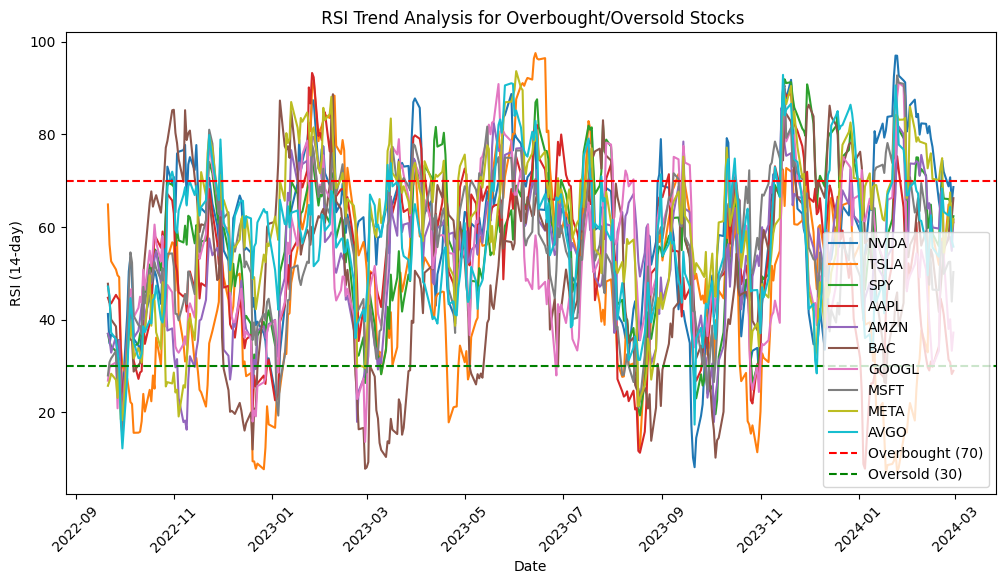

In [ ]:
uploaded = files.upload()

csv_filename = list(uploaded.keys())[0]
df = pd.read_csv(csv_filename, parse_dates=["Date"])

plt.figure(figsize=(12, 6))
for ticker in top_tickers:
    subset = df[df["Ticker"] == ticker]
    plt.plot(subset["Date"], subset["RSI_14"], label=ticker)

plt.axhline(70, linestyle="--", color="red", label="Overbought (70)")
plt.axhline(30, linestyle="--", color="green", label="Oversold (30)")

plt.xlabel("Date")
plt.ylabel("RSI (14-day)")
plt.title(" RSI Trend Analysis for Overbought/Oversold Stocks")
plt.legend()
plt.xticks(rotation=45)
plt.show()


Extracting the file for Tableau implementation

In [ ]:
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt

uploaded = files.upload()

csv_filename = list(uploaded.keys())[0]
df = pd.read_csv(csv_filename, parse_dates=["Date"])

top_tickers = df.groupby("Ticker")["Volume"].sum().nlargest(10).index.tolist()

rsi_df = df[df["Ticker"].isin(top_tickers)][["Date", "Ticker", "RSI_14"]]
rsi_df.to_excel("top10_rsi_14day.xlsx", index=False)

files.download("top10_rsi_14day.xlsx")


Saving rsi_14_long_1_5 (1).csv to rsi_14_long_1_5 (1) (1).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Smart Portfolio Optimization (Model 1)

Saving stocks_long_format_1_5.csv to stocks_long_format_1_5 (2).csv
✅ Smart Portfolio Optimization Summary:

        Expected Return (%)  Risk (Volatility %)  Optimal Allocation (%)
Ticker                                                                  
AAPL                  12.97                25.83                    2.11
ABBV                  22.22                20.11                    2.05
AMZN                  28.46                36.51                    2.38
AVGO                  73.58                33.03                    0.38
BABA                  -4.33                46.48                    0.97
BAC                    8.77                27.49                    0.73
BRK-B                 26.41                16.65                    1.91
COST                  27.48                21.37                    6.69
GOOGL                 20.98                32.56                    1.02
HD                    22.66                23.95                    1.21
JNJ            

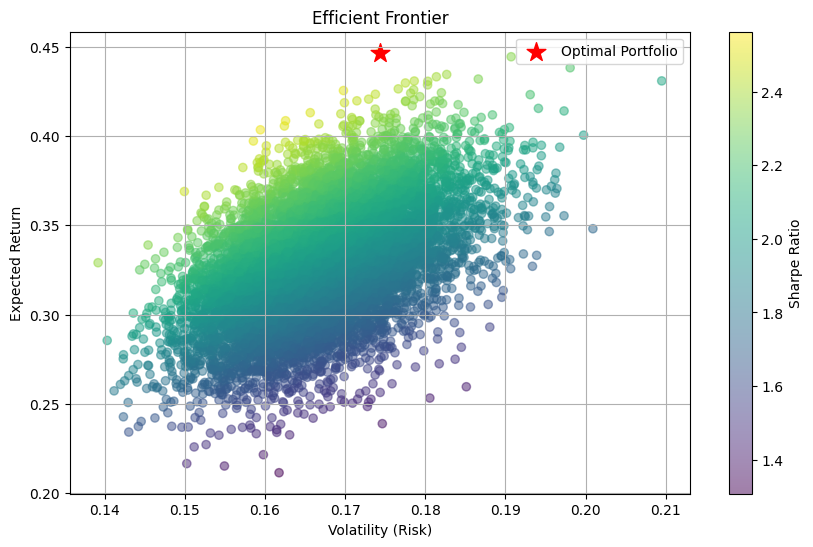

In [ ]:
from google.colab import files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

uploaded = files.upload()
csv_filename = list(uploaded.keys())[0]

df = pd.read_csv(csv_filename, parse_dates=["Date"])
df = df.sort_values(by=["Ticker", "Date"])

df["Daily Return"] = df.groupby("Ticker")["Close"].pct_change()
returns_df = df.pivot(index="Date", columns="Ticker", values="Daily Return").dropna()

expected_returns = returns_df.mean() * 252
cov_matrix = returns_df.cov() * 252
tickers = returns_df.columns

num_portfolios = 10000
results = np.zeros((3 + len(tickers), num_portfolios))

for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)

    port_return = np.dot(weights, expected_returns)
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = port_return / port_volatility

    results[0, i] = port_return
    results[1, i] = port_volatility
    results[2, i] = sharpe_ratio
    results[3:, i] = weights

columns = ["Return", "Volatility", "SharpeRatio"] + list(tickers)
results_df = pd.DataFrame(results.T, columns=columns)

optimal_portfolio = results_df.loc[results_df["SharpeRatio"].idxmax()]

summary_df = pd.DataFrame({
    "Expected Return (%)": (expected_returns * 100).round(2),
    "Risk (Volatility %)": (np.sqrt(np.diag(cov_matrix)) * 100).round(2),
    "Optimal Allocation (%)": (optimal_portfolio[tickers] * 100).round(2)
})

print(" Smart Portfolio Optimization Summary:\n")
print(summary_df)
top5_alloc = summary_df["Optimal Allocation (%)"].sort_values(ascending=False).head(5)

print("\n Recommendation:")
print("Based on Smart Portfolio Optimization, a balanced top 5 stock mix with high expected return and diversified risk includes:\n")
print("🔹 " + ", ".join(top5_alloc.index))
top5_alloc_index = list(top5_alloc.index)

plt.figure(figsize=(10,6))
plt.scatter(results_df["Volatility"], results_df["Return"], c=results_df["SharpeRatio"], cmap="viridis", alpha=0.5)
plt.colorbar(label="Sharpe Ratio")
plt.scatter(optimal_portfolio["Volatility"], optimal_portfolio["Return"], color="r", marker="*", s=200, label="Optimal Portfolio")
plt.xlabel("Volatility (Risk)")
plt.ylabel("Expected Return")
plt.title("Efficient Frontier")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:

!pip install plotly --quiet

import plotly.express as px
import plotly.graph_objects as go

fig = px.scatter(
    results_df,
    x="Volatility",
    y="Return",
    color="SharpeRatio",
    hover_data=tickers,
    title="Efficient Frontier (Interactive)",
    labels={"Volatility": "Risk (Volatility)", "Return": "Expected Return"},
    color_continuous_scale="Viridis"
)

fig.add_trace(go.Scatter(
    x=[optimal_portfolio["Volatility"]],
    y=[optimal_portfolio["Return"]],
    mode="markers+text",
    marker=dict(color="red", size=14, symbol="star"),
    name="Optimal Portfolio",
    text=["Optimal"],
    textposition="top center"
))

# Show plot
fig.update_layout(
    title_font_size=20,
    template="plotly_white",
    legend_title_text="Legend",
    width=900,
    height=600
)
fig.show()


Output hidden; open in https://colab.research.google.com to view.

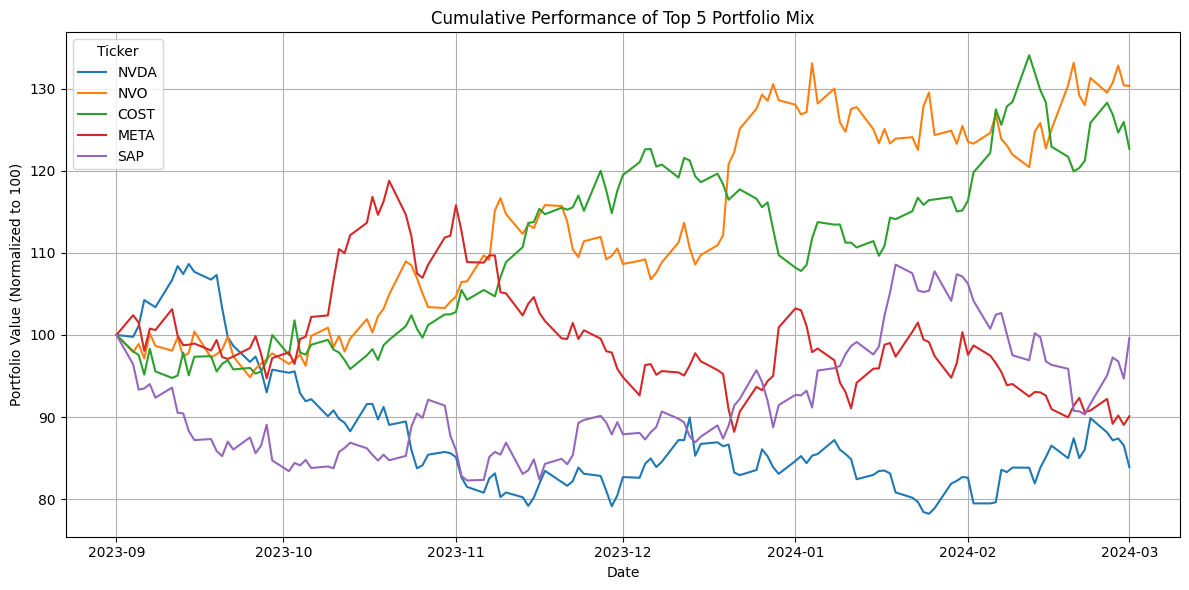

In [ ]:

dates = pd.date_range(start="2023-09-01", end="2024-03-01", freq="B")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
cumulative_returns = pd.DataFrame(index=dates)

for ticker in top5_alloc_index:
    daily_returns = np.random.normal(loc=0.0005, scale=0.02, size=len(dates))
    cumulative_returns[ticker] = (1 + pd.Series(daily_returns, index=dates)).cumprod()

cumulative_returns = cumulative_returns / cumulative_returns.iloc[0] * 100

plt.figure(figsize=(12, 6))
for ticker in top5_alloc_index:
    plt.plot(cumulative_returns.index, cumulative_returns[ticker], label=ticker)

plt.title("Cumulative Performance of Top 5 Portfolio Mix")
plt.xlabel("Date")
plt.ylabel("Portfolio Value (Normalized to 100)")
plt.legend(title="Ticker")
plt.grid(True)
plt.tight_layout()
plt.show()

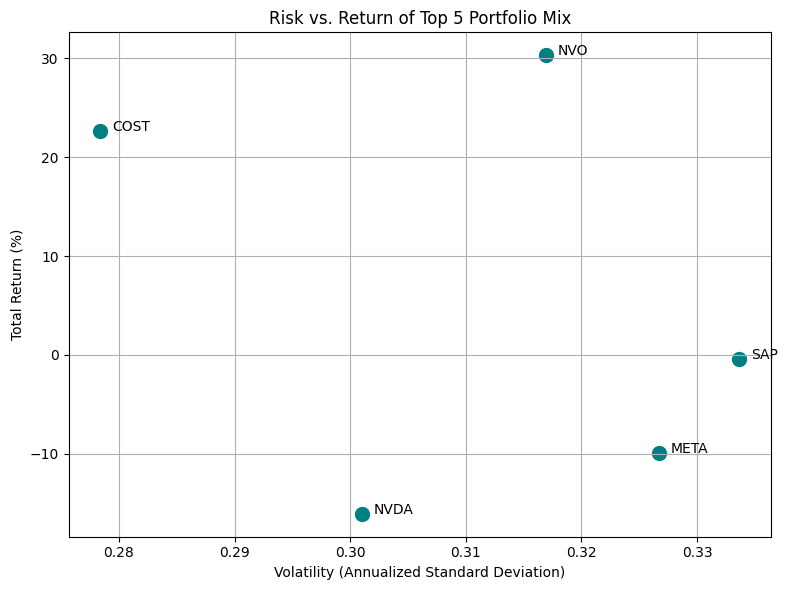

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assume cumulative_returns is already created and normalized
# cumulative_returns = ... (from your simulation or real stock data)
# It should have shape: (dates, tickers)

daily_returns = cumulative_returns.pct_change().dropna()

volatility = daily_returns.std() * np.sqrt(252)

total_return = cumulative_returns.iloc[-1] - 100  # Since you normalized to 100

summary = pd.DataFrame({
    "Volatility": volatility,
    "Total Return": total_return
})

plt.figure(figsize=(8, 6))
plt.scatter(summary["Volatility"], summary["Total Return"], color="teal", s=100)

# Add ticker labels
for ticker in summary.index:
    plt.text(summary.loc[ticker, "Volatility"] + 0.001,
             summary.loc[ticker, "Total Return"],
             ticker)

plt.title("Risk vs. Return of Top 5 Portfolio Mix")
plt.xlabel("Volatility (Annualized Standard Deviation)")
plt.ylabel("Total Return (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


Anomaly Detection for Insider Trading & Market Manipulation

Saving stocks_long_format_1_5.csv to stocks_long_format_1_5 (1).csv

✅ Suspicious spikes detected. Sample:


,Ticker,Date,Price,Volume,Z_Score,Vol_Spike
0,ABBV,2023-04-27,139.323654,17063000,-3.18,3.28
1,BABA,2023-03-28,95.029465,118875200,3.15,4.27
2,JPM,2023-04-14,132.898239,43931300,3.39,3.08
3,LLY,2023-08-08,515.267456,15094500,3.38,5.02
4,META,2022-10-27,97.480576,232316600,-3.30,4.45


<ipython-input-4-9fa2962a779a>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=spike_counts.values, y=spike_counts.index, palette="rocket")


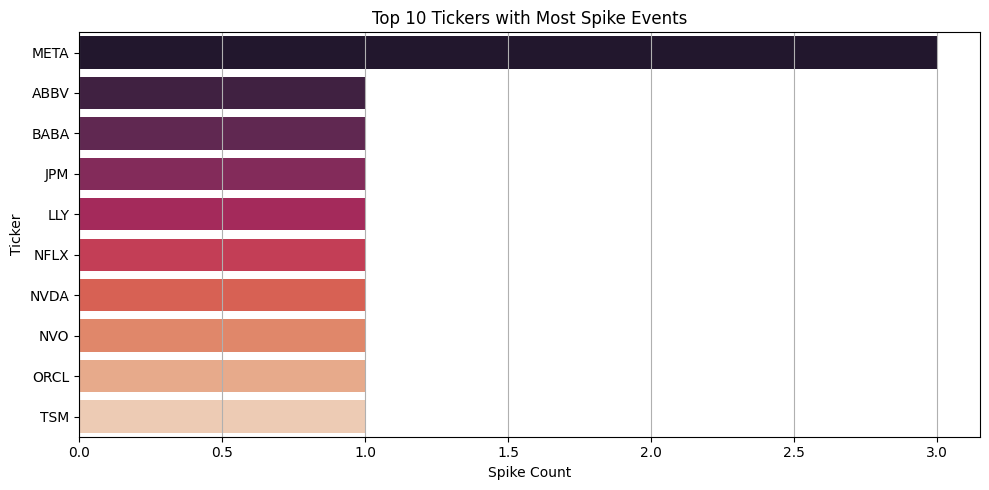

<ipython-input-4-9fa2962a779a>:81: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_plot = df_ticker[df_ticker["Date"].isin(suspicious_df[suspicious_df["Ticker"] == top_ticker]["Date"])]


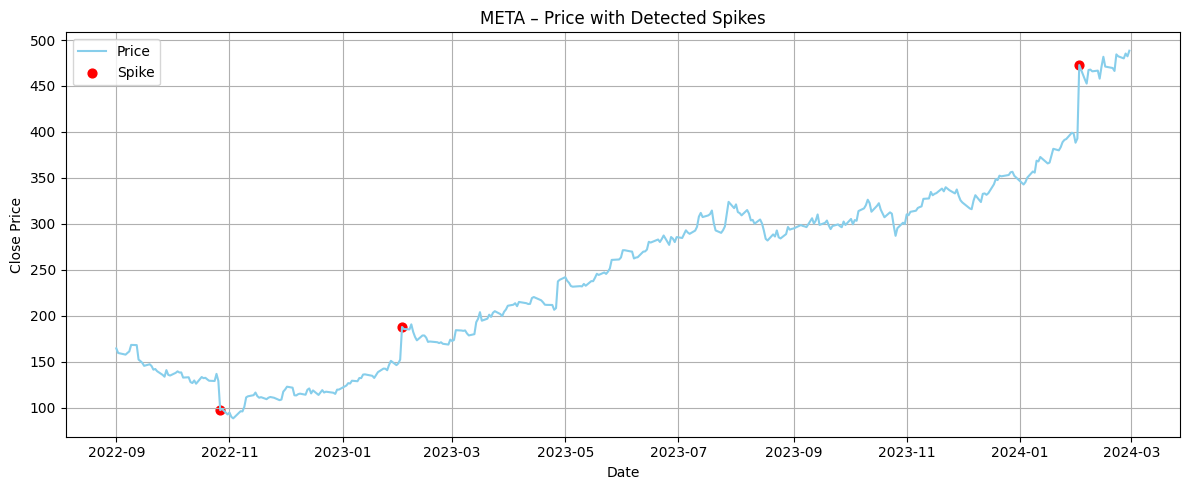

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename, parse_dates=["Date"])

df = df.sort_values(by=["Ticker", "Date"])
df = df.dropna(subset=["Close", "Volume"])
tickers = df["Ticker"].unique()

rolling_window = 14
price_z_thresh = 3
volume_spike_thresh = 3

suspicious_events = []

for ticker in tickers:
    df_ticker = df[df["Ticker"] == ticker].copy()
    df_ticker["Return"] = df_ticker["Close"].pct_change()

    df_ticker["Roll_Mean_Price"] = df_ticker["Close"].rolling(rolling_window).mean()
    df_ticker["Roll_Std_Price"] = df_ticker["Close"].rolling(rolling_window).std()
    df_ticker["Roll_Mean_Vol"] = df_ticker["Volume"].rolling(rolling_window).mean()

    df_ticker["Z_Score_Price"] = (df_ticker["Close"] - df_ticker["Roll_Mean_Price"]) / df_ticker["Roll_Std_Price"]
    df_ticker["Volume_Spike"] = df_ticker["Volume"] / df_ticker["Roll_Mean_Vol"]

    # Flag suspicious days
    df_ticker["Suspicious"] = (df_ticker["Z_Score_Price"].abs() > price_z_thresh) & (df_ticker["Volume_Spike"] > volume_spike_thresh)
    spikes = df_ticker[df_ticker["Suspicious"]]

    if not spikes.empty:
        for _, row in spikes.iterrows():
            suspicious_events.append({
                "Ticker": ticker,
                "Date": row["Date"].date(),
                "Price": row["Close"],
                "Volume": row["Volume"],
                "Z_Score": round(row["Z_Score_Price"], 2),
                "Vol_Spike": round(row["Volume_Spike"], 2)
            })

suspicious_df = pd.DataFrame(suspicious_events)

if not suspicious_df.empty:
    print("\n Suspicious spikes detected. Sample:")
    display(suspicious_df.head())
else:
    print("No suspicious spikes detected.")

if not suspicious_df.empty:
    spike_counts = suspicious_df["Ticker"].value_counts().head(10)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=spike_counts.values, y=spike_counts.index, palette="rocket")
    plt.title("Top 10 Tickers with Most Spike Events")
    plt.xlabel("Spike Count")
    plt.ylabel("Ticker")
    plt.grid(axis="x")
    plt.tight_layout()
    plt.show()

    top_ticker = spike_counts.index[0]
    df_ticker = df[df["Ticker"] == top_ticker].copy()
    df_ticker["Date"] = pd.to_datetime(df_ticker["Date"])
    df_plot = df_ticker[df_ticker["Date"].isin(suspicious_df[suspicious_df["Ticker"] == top_ticker]["Date"])]

    plt.figure(figsize=(12, 5))
    plt.plot(df_ticker["Date"], df_ticker["Close"], label="Price", color="skyblue")
    plt.scatter(df_plot["Date"], df_plot["Close"], color="red", label="Spike", s=40)
    plt.title(f"{top_ticker} – Price with Detected Spikes")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Next-Day Price Prediction (Deep Learning Forecasting)

Saving stocks_long_format_1_5.csv to stocks_long_format_1_5.csv


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


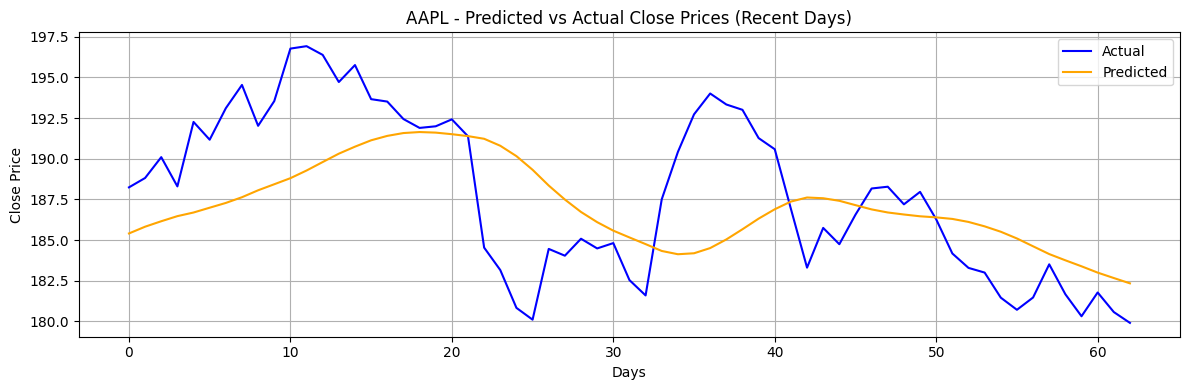

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 468ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 277ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


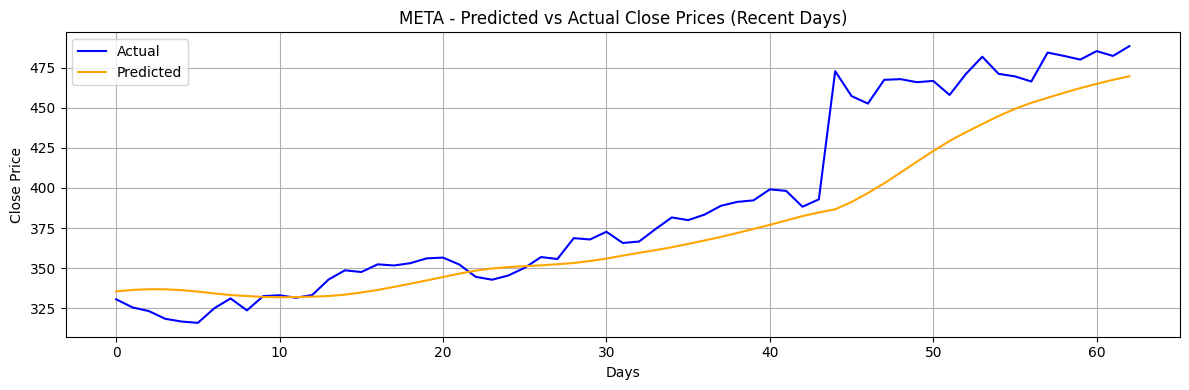

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


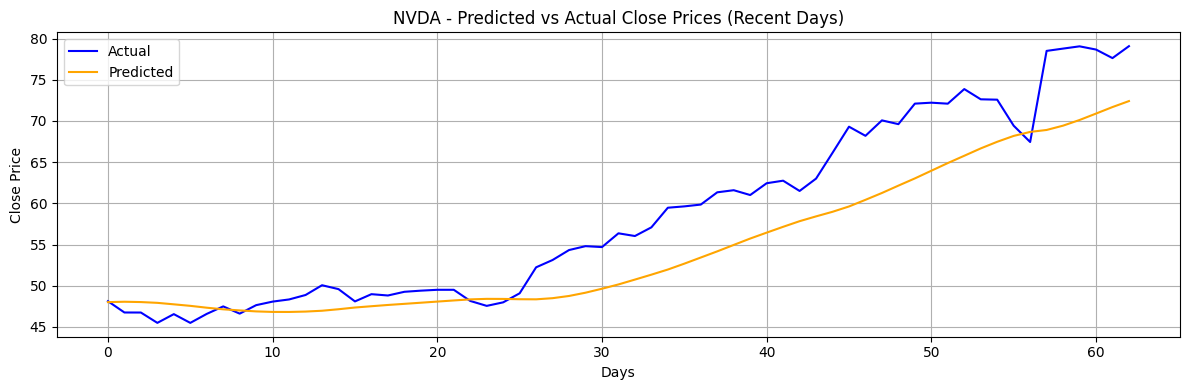

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
✅ RMSE per Ticker:
   Ticker   RMSE
28    WMT   1.32
5     BAC   1.37
29    XOM   2.26
10    JNJ   2.77
20     PG   3.71
8   GOOGL   4.45
0    AAPL   4.47
19   ORCL   4.51
4    BABA   4.87
18    NVO   4.99
17   NVDA   5.23
2    AMZN   5.73
23   TMUS   5.92
1    ABBV   6.13
3    AVGO   7.71
15   MSFT   7.79
11    JPM   9.02
25    TSM   9.52
24   TSLA  10.84
26    UNH  11.51
6   BRK-B  11.64
21    SAP  12.46
9      HD  13.82
27      V  14.13
22    SPY  16.22
7    COST  20.69
13     MA  24.79
14   META  25.68
16   NFLX  29.66
12    LLY  30.70


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from google.colab import files

uploaded = files.upload()
filename = list(uploaded.keys())[0]

df = pd.read_csv(filename, parse_dates=["Date"])
df = df.sort_values(by=["Ticker", "Date"])
tickers = df["Ticker"].unique()

window_size = 60
feature_col = "Close"
results = []

for ticker in tickers:
    df_ticker = df[df["Ticker"] == ticker].copy()
    df_ticker = df_ticker.dropna(subset=[feature_col])

    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df_ticker[[feature_col]])

    X, y = [], []
    for i in range(window_size, len(scaled_data)):
        X.append(scaled_data[i-window_size:i, 0])
        y.append(scaled_data[i, 0])
    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    split = int(len(X) * 0.8)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(X.shape[1], 1)),
        Dropout(0.2),
        LSTM(64),
        Dropout(0.2),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    predictions = model.predict(X_test)
    predictions_unscaled = scaler.inverse_transform(predictions)
    y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

    rmse = np.sqrt(mean_squared_error(y_test_unscaled, predictions_unscaled))
    results.append({"Ticker": ticker, "RMSE": round(rmse, 2)})

    if ticker in ["AAPL", "META", "NVDA"]:
        plt.figure(figsize=(12, 4))
        plt.plot(y_test_unscaled, label="Actual", color="blue")
        plt.plot(predictions_unscaled, label="Predicted", color="orange")
        plt.title(f"{ticker} - Predicted vs Actual Close Prices (Recent Days)")
        plt.xlabel("Days")
        plt.ylabel("Close Price")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

results_df = pd.DataFrame(results).sort_values(by="RMSE")
print("RMSE per Ticker:")
print(results_df)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from google.colab import files

uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename, parse_dates=["Date"])
df = df.sort_values(by=["Ticker", "Date"])

window_size = 60
feature_col = "Close"
epochs = 20
results = []

tickers = df["Ticker"].unique()

for ticker in tickers:
    df_ticker = df[df["Ticker"] == ticker].copy().dropna(subset=[feature_col])
    if len(df_ticker) < window_size + 3:
        continue  # not enough data

    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(df_ticker[[feature_col]])

    # Create sequences
    X, y = [], []
    for i in range(window_size, len(scaled)):
        X.append(scaled[i - window_size:i, 0])
        y.append(scaled[i, 0])
    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    # Keep last 2 records for test
    X_train, y_train = X[:-2], y[:-2]
    X_test, y_test = X[-2:], y[-2:]

    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(X.shape[1], 1)),
        Dropout(0.3),
        LSTM(64),
        Dropout(0.3),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=0,
              callbacks=[EarlyStopping(monitor='loss', patience=3, restore_best_weights=True)])

    preds = model.predict(X_test)
    preds_unscaled = scaler.inverse_transform(preds)
    y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

    last_2_dates = df_ticker.iloc[-2:]["Date"].values

    # Store results
    for i in range(2):
        results.append({
            "Ticker": ticker,
            "Date": pd.to_datetime(last_2_dates[i]).date(),
            "Actual Close": round(float(y_test_unscaled[i]), 2),
            "Predicted Close": round(float(preds_unscaled[i]), 2),
            "Error": round(abs(y_test_unscaled[i] - preds_unscaled[i])[0], 2)
        })

result_df = pd.DataFrame(results).sort_values(by="Error")
print("✅ Final 2-Day Prediction Accuracy Summary:")
display(result_df.head(20))  # Show top 20 lowest error predictions

# result_df.to_csv("next_day_predictions_all_tickers.csv", index=False)


Saving stocks_long_format_1_5.csv to stocks_long_format_1_5 (2).csv


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


<ipython-input-3-3b844bc8da82>:72: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Actual Close": round(float(y_test_unscaled[i]), 2),
<ipython-input-3-3b844bc8da82>:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Predicted Close": round(float(preds_unscaled[i]), 2),
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


<ipython-input-3-3b844bc8da82>:72: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Actual Close": round(float(y_test_unscaled[i]), 2),
<ipython-input-3-3b844bc8da82>:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Predicted Close": round(float(preds_unscaled[i]), 2),
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


<ipython-input-3-3b844bc8da82>:72: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Actual Close": round(float(y_test_unscaled[i]), 2),
<ipython-input-3-3b844bc8da82>:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Predicted Close": round(float(preds_unscaled[i]), 2),
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


<ipython-input-3-3b844bc8da82>:72: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Actual Close": round(float(y_test_unscaled[i]), 2),
<ipython-input-3-3b844bc8da82>:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Predicted Close": round(float(preds_unscaled[i]), 2),
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


<ipython-input-3-3b844bc8da82>:72: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Actual Close": round(float(y_test_unscaled[i]), 2),
<ipython-input-3-3b844bc8da82>:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Predicted Close": round(float(preds_unscaled[i]), 2),
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


<ipython-input-3-3b844bc8da82>:72: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Actual Close": round(float(y_test_unscaled[i]), 2),
<ipython-input-3-3b844bc8da82>:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Predicted Close": round(float(preds_unscaled[i]), 2),
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


<ipython-input-3-3b844bc8da82>:72: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Actual Close": round(float(y_test_unscaled[i]), 2),
<ipython-input-3-3b844bc8da82>:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Predicted Close": round(float(preds_unscaled[i]), 2),
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


<ipython-input-3-3b844bc8da82>:72: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Actual Close": round(float(y_test_unscaled[i]), 2),
<ipython-input-3-3b844bc8da82>:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Predicted Close": round(float(preds_unscaled[i]), 2),
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


<ipython-input-3-3b844bc8da82>:72: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Actual Close": round(float(y_test_unscaled[i]), 2),
<ipython-input-3-3b844bc8da82>:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Predicted Close": round(float(preds_unscaled[i]), 2),
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


<ipython-input-3-3b844bc8da82>:72: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Actual Close": round(float(y_test_unscaled[i]), 2),
<ipython-input-3-3b844bc8da82>:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Predicted Close": round(float(preds_unscaled[i]), 2),
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


<ipython-input-3-3b844bc8da82>:72: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Actual Close": round(float(y_test_unscaled[i]), 2),
<ipython-input-3-3b844bc8da82>:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Predicted Close": round(float(preds_unscaled[i]), 2),
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


<ipython-input-3-3b844bc8da82>:72: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Actual Close": round(float(y_test_unscaled[i]), 2),
<ipython-input-3-3b844bc8da82>:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Predicted Close": round(float(preds_unscaled[i]), 2),
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


<ipython-input-3-3b844bc8da82>:72: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Actual Close": round(float(y_test_unscaled[i]), 2),
<ipython-input-3-3b844bc8da82>:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Predicted Close": round(float(preds_unscaled[i]), 2),
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


<ipython-input-3-3b844bc8da82>:72: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Actual Close": round(float(y_test_unscaled[i]), 2),
<ipython-input-3-3b844bc8da82>:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Predicted Close": round(float(preds_unscaled[i]), 2),
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


<ipython-input-3-3b844bc8da82>:72: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Actual Close": round(float(y_test_unscaled[i]), 2),
<ipython-input-3-3b844bc8da82>:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Predicted Close": round(float(preds_unscaled[i]), 2),
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


<ipython-input-3-3b844bc8da82>:72: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Actual Close": round(float(y_test_unscaled[i]), 2),
<ipython-input-3-3b844bc8da82>:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Predicted Close": round(float(preds_unscaled[i]), 2),
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


<ipython-input-3-3b844bc8da82>:72: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Actual Close": round(float(y_test_unscaled[i]), 2),
<ipython-input-3-3b844bc8da82>:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Predicted Close": round(float(preds_unscaled[i]), 2),
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


<ipython-input-3-3b844bc8da82>:72: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Actual Close": round(float(y_test_unscaled[i]), 2),
<ipython-input-3-3b844bc8da82>:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Predicted Close": round(float(preds_unscaled[i]), 2),
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


<ipython-input-3-3b844bc8da82>:72: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Actual Close": round(float(y_test_unscaled[i]), 2),
<ipython-input-3-3b844bc8da82>:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Predicted Close": round(float(preds_unscaled[i]), 2),
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step


<ipython-input-3-3b844bc8da82>:72: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Actual Close": round(float(y_test_unscaled[i]), 2),
<ipython-input-3-3b844bc8da82>:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Predicted Close": round(float(preds_unscaled[i]), 2),
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


<ipython-input-3-3b844bc8da82>:72: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Actual Close": round(float(y_test_unscaled[i]), 2),
<ipython-input-3-3b844bc8da82>:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Predicted Close": round(float(preds_unscaled[i]), 2),
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


<ipython-input-3-3b844bc8da82>:72: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Actual Close": round(float(y_test_unscaled[i]), 2),
<ipython-input-3-3b844bc8da82>:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Predicted Close": round(float(preds_unscaled[i]), 2),
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


<ipython-input-3-3b844bc8da82>:72: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Actual Close": round(float(y_test_unscaled[i]), 2),
<ipython-input-3-3b844bc8da82>:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Predicted Close": round(float(preds_unscaled[i]), 2),
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


<ipython-input-3-3b844bc8da82>:72: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Actual Close": round(float(y_test_unscaled[i]), 2),
<ipython-input-3-3b844bc8da82>:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Predicted Close": round(float(preds_unscaled[i]), 2),
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


<ipython-input-3-3b844bc8da82>:72: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Actual Close": round(float(y_test_unscaled[i]), 2),
<ipython-input-3-3b844bc8da82>:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Predicted Close": round(float(preds_unscaled[i]), 2),
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step


<ipython-input-3-3b844bc8da82>:72: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Actual Close": round(float(y_test_unscaled[i]), 2),
<ipython-input-3-3b844bc8da82>:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Predicted Close": round(float(preds_unscaled[i]), 2),
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step


<ipython-input-3-3b844bc8da82>:72: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Actual Close": round(float(y_test_unscaled[i]), 2),
<ipython-input-3-3b844bc8da82>:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Predicted Close": round(float(preds_unscaled[i]), 2),
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


<ipython-input-3-3b844bc8da82>:72: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Actual Close": round(float(y_test_unscaled[i]), 2),
<ipython-input-3-3b844bc8da82>:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Predicted Close": round(float(preds_unscaled[i]), 2),
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


<ipython-input-3-3b844bc8da82>:72: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Actual Close": round(float(y_test_unscaled[i]), 2),
<ipython-input-3-3b844bc8da82>:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Predicted Close": round(float(preds_unscaled[i]), 2),
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
✅ Final 2-Day Prediction Accuracy Summary:


<ipython-input-3-3b844bc8da82>:72: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Actual Close": round(float(y_test_unscaled[i]), 2),
<ipython-input-3-3b844bc8da82>:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  "Predicted Close": round(float(preds_unscaled[i]), 2),


,Ticker,Date,Actual Close,Predicted Close,Error
3,ABBV,2024-02-29,169.86,169.85,0.01
7,AVGO,2024-02-29,128.32,128.35,0.03
4,AMZN,2024-02-28,173.16,173.11,0.05
36,NVO,2024-02-28,120.22,120.43,0.21
47,TMUS,2024-02-29,161.03,160.62,0.41
46,TMUS,2024-02-28,160.88,160.34,0.54
6,AVGO,2024-02-28,127.23,127.93,0.70
34,NVDA,2024-02-28,77.63,76.78,0.85
10,BAC,2024-02-28,33.25,32.33,0.92
12,BRK-B,2024-02-28,412.14,411.14,1.00


Saving stocks_long_format_1_5.csv to stocks_long_format_1_5.csv


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 341ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 324ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 727ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 333ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 464ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 327ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 337ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 327ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 330ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 334ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 344ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 358ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 348ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 333ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 326ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 423ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 508ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 353ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 337ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 335ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 331ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 357ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 368ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 347ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 338ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 391ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 431ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 350ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 340ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 327ms/step
✅ RMSE per Ticker:
   Ticker   RMSE
5     BAC   1.14
28    WMT   1.50
29    XOM   2.40
10    JNJ   2.65
8   GOOGL   4.10
20     PG   4.15
0    AAPL   4.34
19   ORCL   4.42
4    BABA   4.80
17   NVDA   5.05
1    ABBV   5.33
18    NVO   6.18
3    AVGO   7.61
2    AMZN   7.74
23   TMUS   7.75
15   MSFT   7.93
11    JPM  10.20
21    SAP  10.92
25    TSM  10.97
27      V  11.33
24   TSLA  11.42
26    UNH  11.70
22    SPY  12.99
6   BRK-B  15.06
9      HD  15.18
7    COST  16.17
13     MA  24.18
14   META  28.09
12    LLY  30.80
16   NFLX  38.74


<ipython-input-1-e0505d5519b2>:102: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


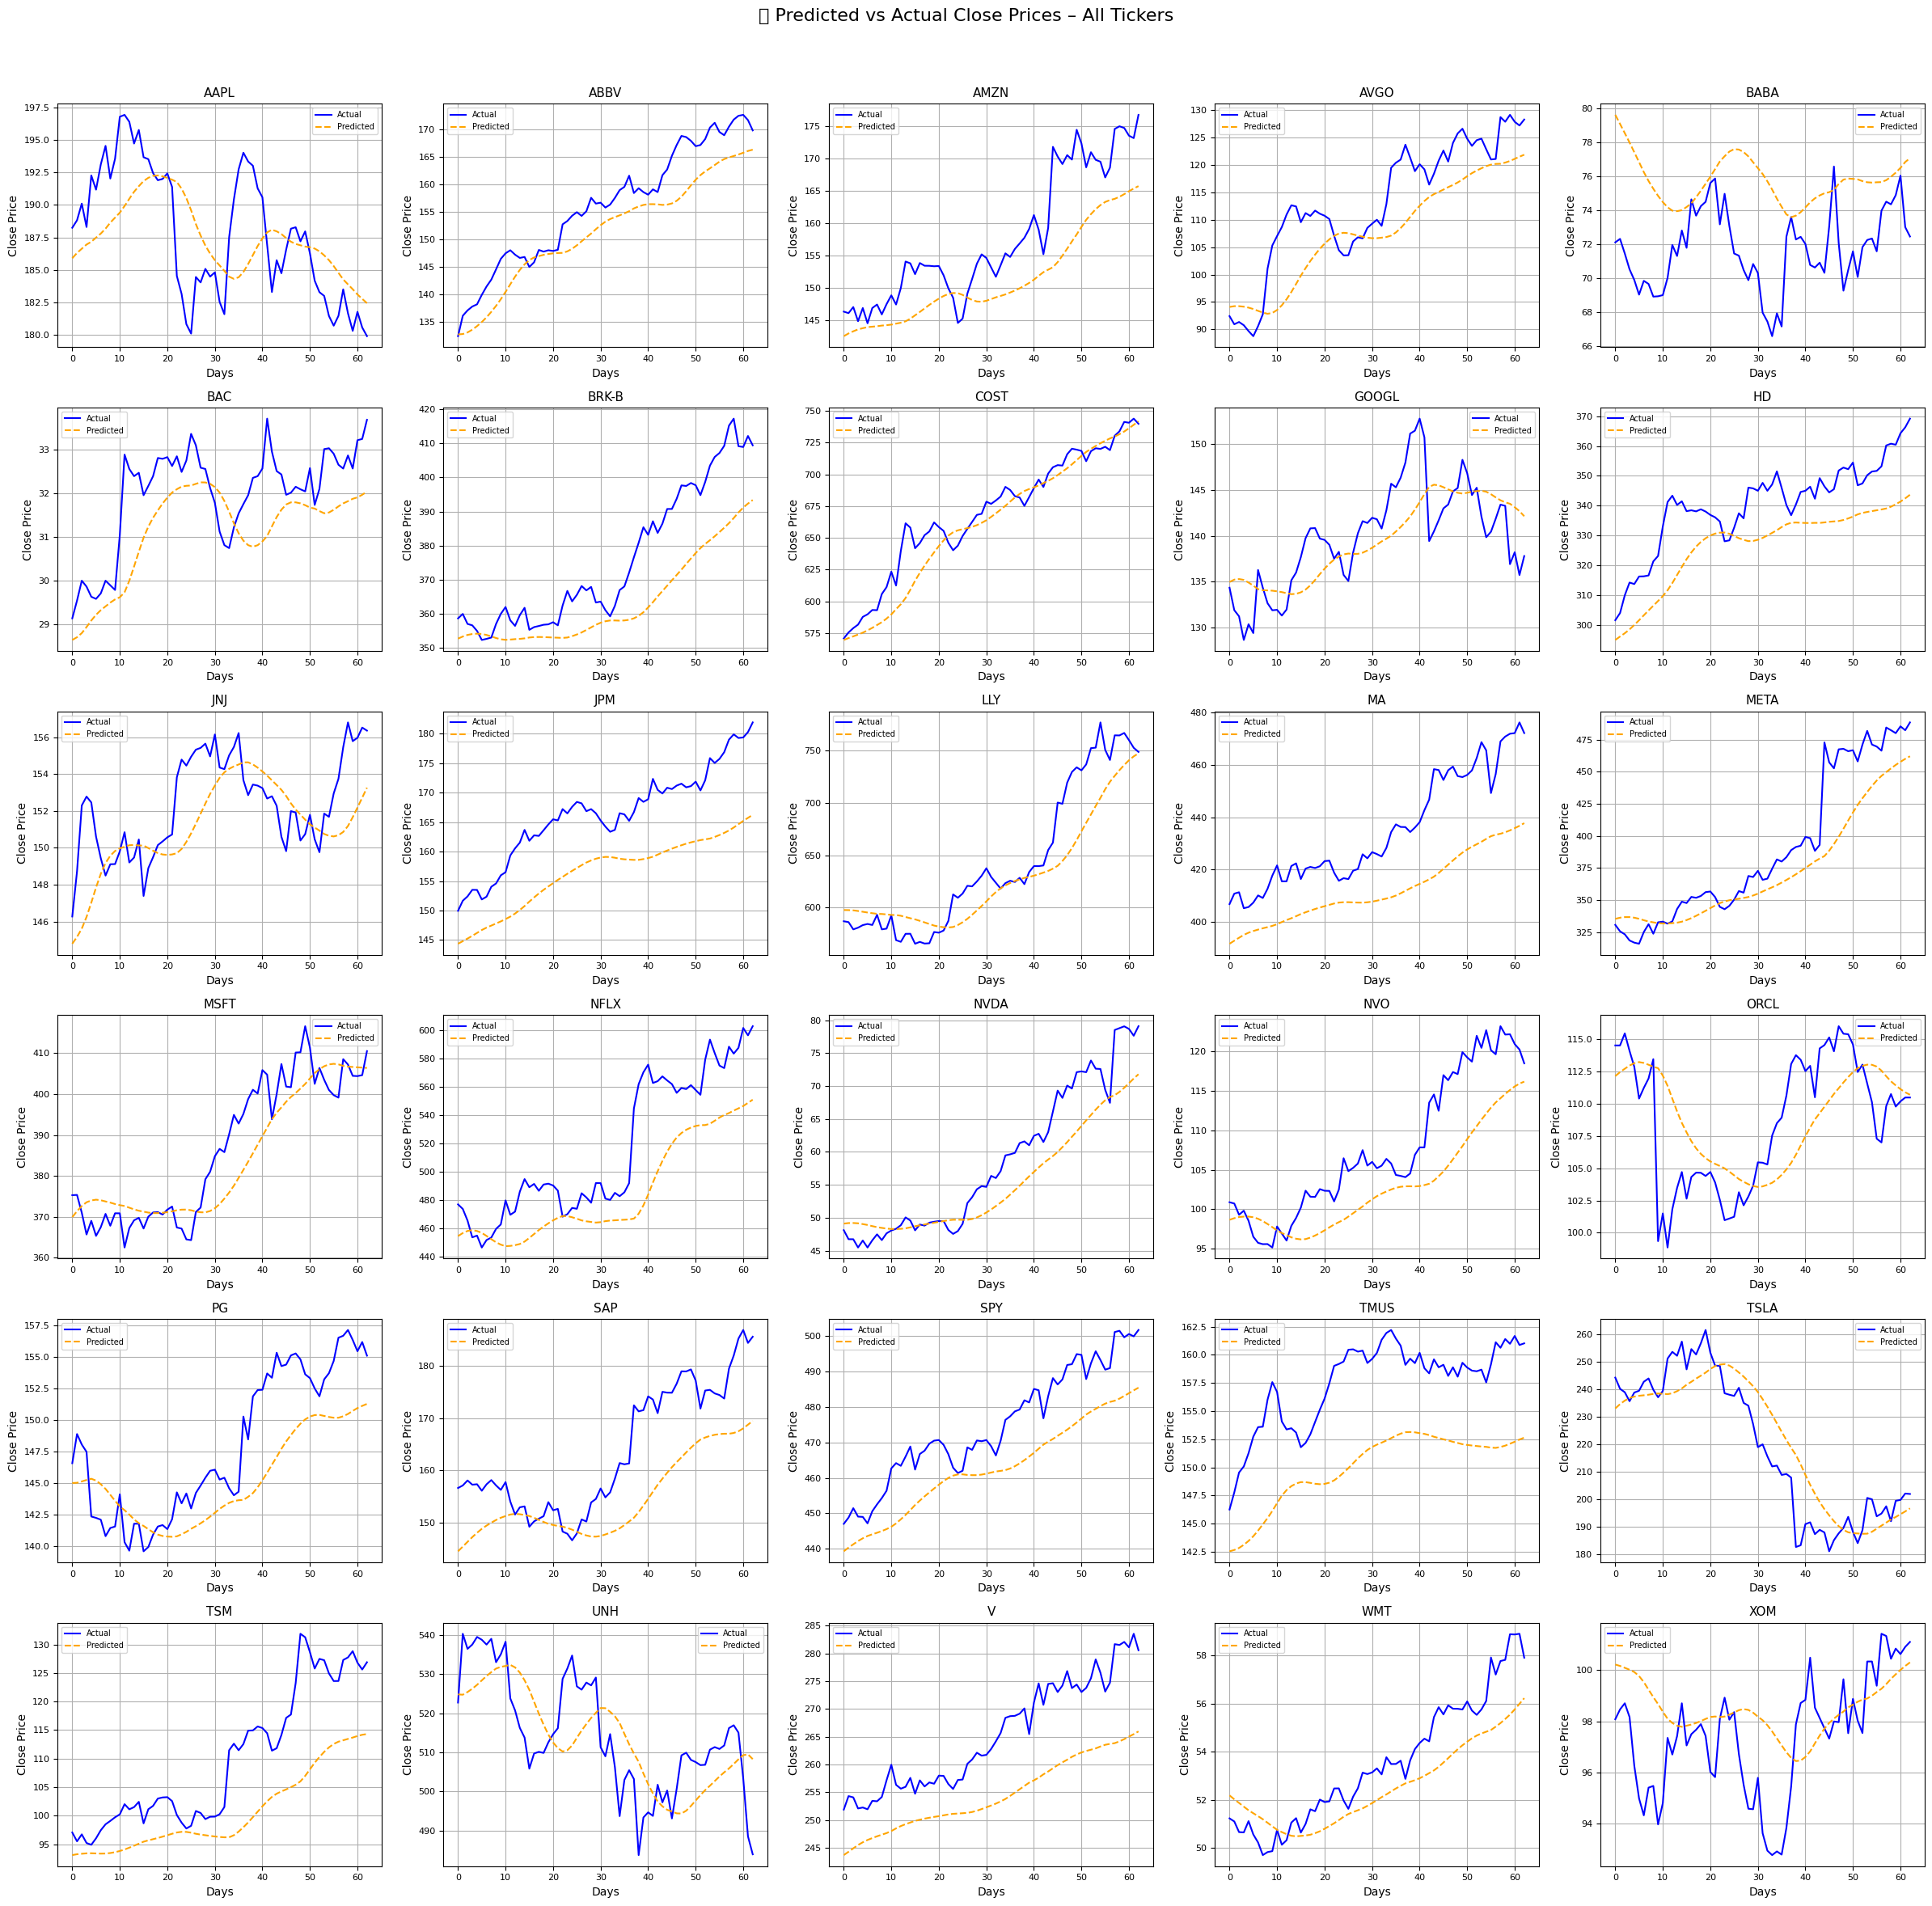

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from google.colab import files

uploaded = files.upload()
filename = list(uploaded.keys())[0]

df = pd.read_csv(filename, parse_dates=["Date"])
df = df.sort_values(by=["Ticker", "Date"])
tickers = df["Ticker"].unique()

# Configs
window_size = 60
feature_col = "Close"
results = []
predicted_dict = {}

for ticker in tickers:
    df_ticker = df[df["Ticker"] == ticker].copy()
    df_ticker = df_ticker.dropna(subset=[feature_col])

    # Scale Close price
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df_ticker[[feature_col]])

    # Create sequences
    X, y = [], []
    for i in range(window_size, len(scaled_data)):
        X.append(scaled_data[i-window_size:i, 0])
        y.append(scaled_data[i, 0])
    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    # Train-test split (chronological)
    split = int(len(X) * 0.8)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    # Model
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(X.shape[1], 1)),
        Dropout(0.2),
        LSTM(64),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)

    # Predict and unscale
    predictions = model.predict(X_test)
    predictions_unscaled = scaler.inverse_transform(predictions)
    y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

    # Store for plotting
    predicted_dict[ticker] = (y_test_unscaled, predictions_unscaled)

    # Evaluate
    rmse = np.sqrt(mean_squared_error(y_test_unscaled, predictions_unscaled))
    results.append({"Ticker": ticker, "RMSE": round(rmse, 2)})

results_df = pd.DataFrame(results).sort_values(by="RMSE")
print("RMSE per Ticker:")
print(results_df)

num_tickers = len(tickers)
cols = 5
rows = math.ceil(num_tickers / cols)

fig, axs = plt.subplots(rows, cols, figsize=(24, rows * 4))
axs = axs.flatten()

for idx, ticker in enumerate(tickers):
    actual, predicted = predicted_dict[ticker]
    ax = axs[idx]
    ax.plot(actual, label='Actual', color='blue', linewidth=1.5)
    ax.plot(predicted, label='Predicted', color='orange', linestyle='--', linewidth=1.5)
    ax.set_title(f"{ticker}", fontsize=11)
    ax.set_xlabel("Days", fontsize=10)
    ax.set_ylabel("Close Price", fontsize=10)
    ax.tick_params(axis='both', labelsize=8)
    ax.legend(fontsize=7)
    ax.grid(True)

# Remove unused axes if any
for i in range(len(tickers), len(axs)):
    fig.delaxes(axs[i])

plt.suptitle("Predicted vs Actual Close Prices – All Tickers", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Hidden Correlation Discovery Using Pearson Correlation + Hierarchical Clustering

Saving stocks_long_format_1_5.csv to stocks_long_format_1_5.csv


<ipython-input-1-6931dbf80a73>:31: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


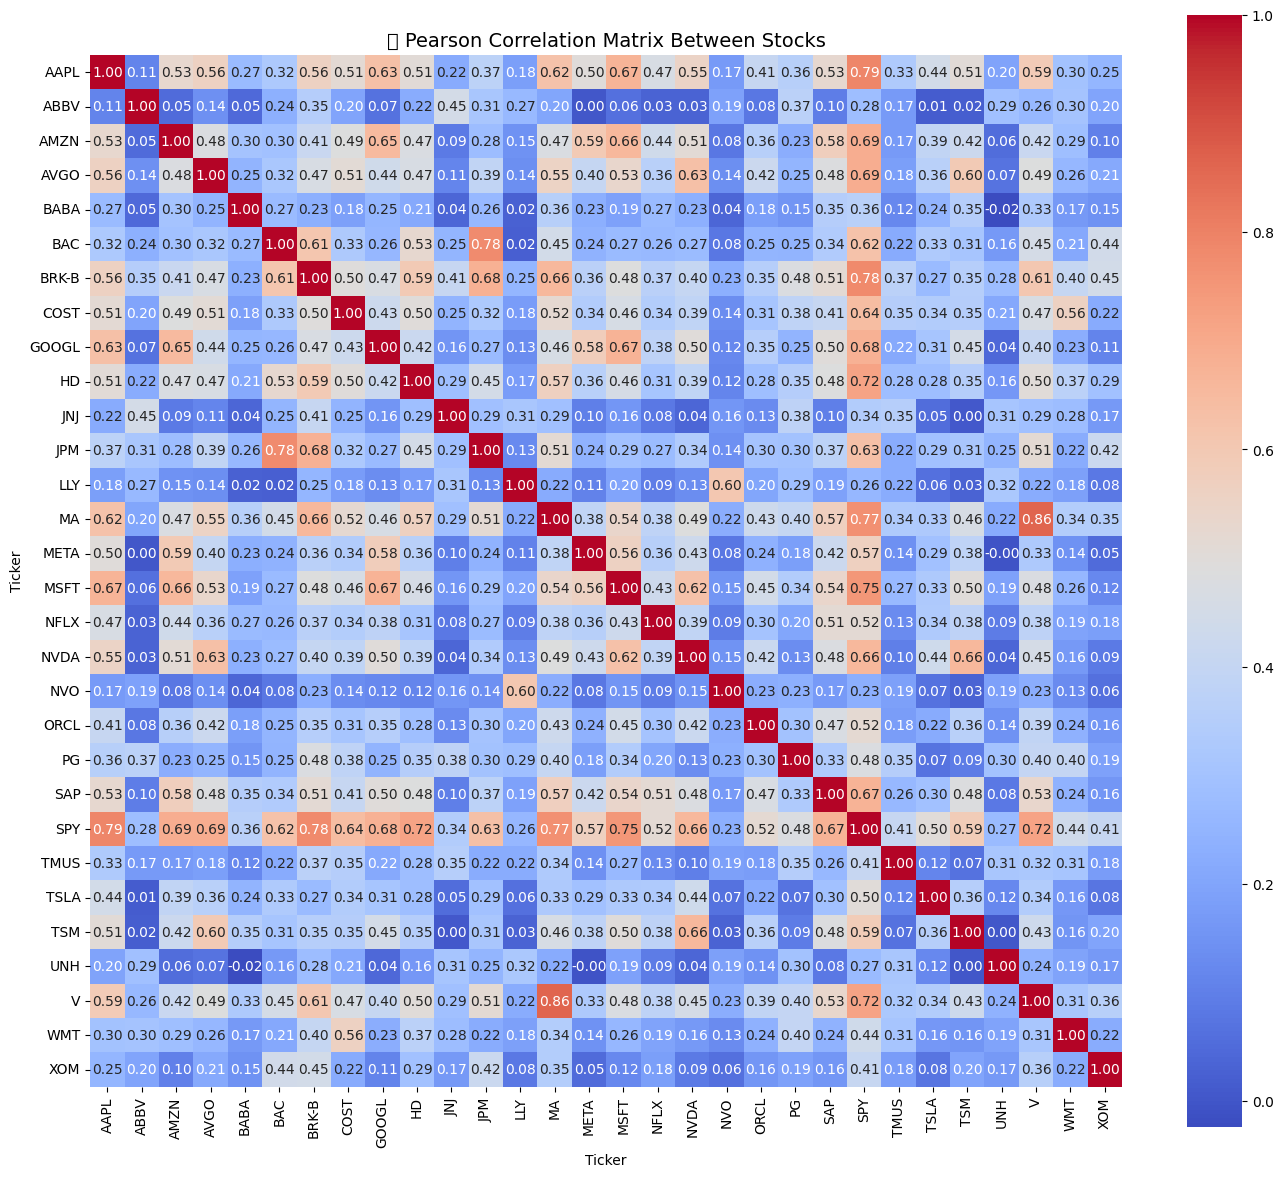

<ipython-input-1-6931dbf80a73>:43: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


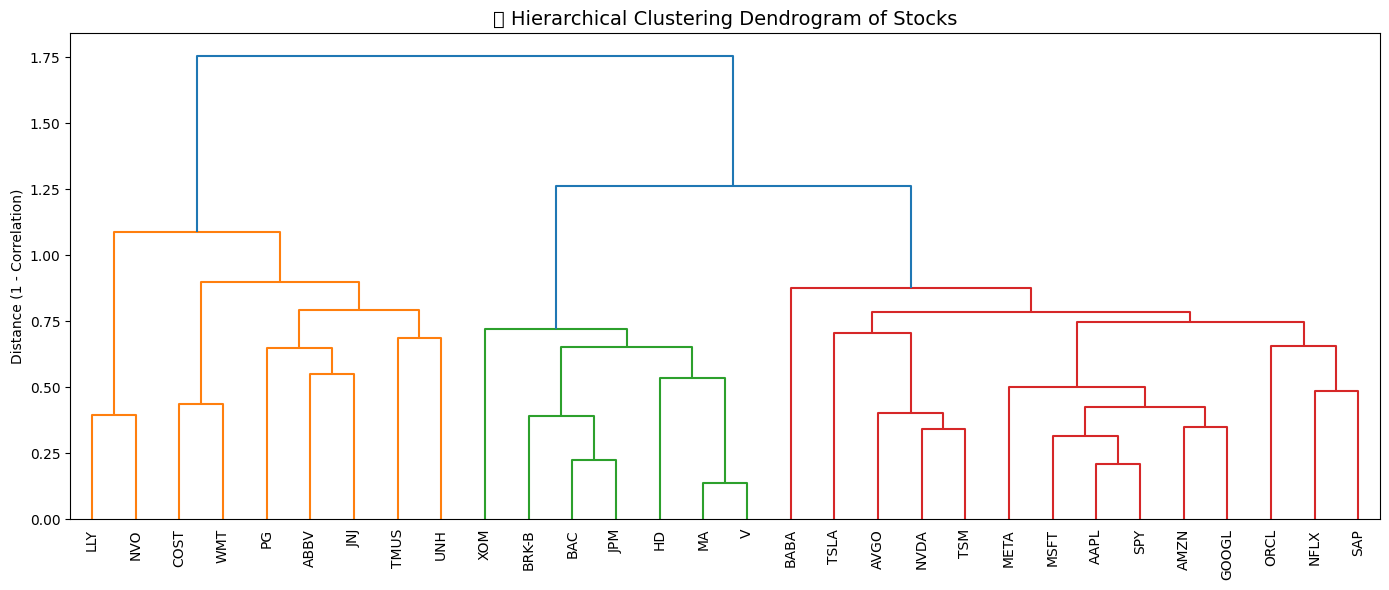

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform
from google.colab import files

uploaded = files.upload()
filename = list(uploaded.keys())[0]

df = pd.read_csv(filename, parse_dates=["Date"])
df = df.sort_values(by=["Ticker", "Date"])

# Pivot to get Close prices per Ticker over time
price_matrix = df.pivot(index="Date", columns="Ticker", values="Close")

# Calculate daily returns
returns = price_matrix.pct_change().dropna()

# Pearson Correlation Matrix
correlation_matrix = returns.corr()

# Heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("📊 Pearson Correlation Matrix Between Stocks", fontsize=14)
plt.tight_layout()
plt.show()

#Hierarchical Clustering
distance_matrix = 1 - correlation_matrix
linkage = sch.linkage(squareform(distance_matrix), method='ward')

# Dendrogram
plt.figure(figsize=(14, 6))
sch.dendrogram(linkage, labels=correlation_matrix.columns, leaf_rotation=90)
plt.title("🔗 Hierarchical Clustering Dendrogram of Stocks", fontsize=14)
plt.ylabel("Distance (1 - Correlation)")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
from itertools import groupby
from operator import itemgetter

uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename, parse_dates=["Date"])

df = df.sort_values(by=["Ticker", "Date"])
df = df.dropna(subset=["Close", "Volume"])
tickers = df["Ticker"].unique()

rolling_window = 14
price_z_thresh = 3
volume_spike_thresh = 3
max_day_gap = 3  # group spikes within ±3 days

suspicious_events = []

for ticker in tickers:
    df_ticker = df[df["Ticker"] == ticker].copy()
    df_ticker["Return"] = df_ticker["Close"].pct_change()

    # Rolling statistics
    df_ticker["Roll_Mean_Price"] = df_ticker["Close"].rolling(rolling_window).mean()
    df_ticker["Roll_Std_Price"] = df_ticker["Close"].rolling(rolling_window).std()
    df_ticker["Roll_Mean_Vol"] = df_ticker["Volume"].rolling(rolling_window).mean()

    # Z-score and volume spike
    df_ticker["Z_Score_Price"] = (df_ticker["Close"] - df_ticker["Roll_Mean_Price"]) / df_ticker["Roll_Std_Price"]
    df_ticker["Volume_Spike"] = df_ticker["Volume"] / df_ticker["Roll_Mean_Vol"]

    # Flag suspicious days
    df_ticker["Suspicious"] = (df_ticker["Z_Score_Price"].abs() > price_z_thresh) & (df_ticker["Volume_Spike"] > volume_spike_thresh)
    spikes = df_ticker[df_ticker["Suspicious"]]

    if not spikes.empty:
        for _, row in spikes.iterrows():
            suspicious_events.append({
                "Ticker": ticker,
                "Date": row["Date"].date(),
                "Price": row["Close"],
                "Volume": row["Volume"],
                "Z_Score": round(row["Z_Score_Price"], 2),
                "Vol_Spike": round(row["Volume_Spike"], 2)
            })

suspicious_df = pd.DataFrame(suspicious_events)

if not suspicious_df.empty:
    print("\n Suspicious spikes detected. Sample:")
    display(suspicious_df.head())
else:
    print("No suspicious spikes detected.")



Saving stocks_long_format_1_5.csv to stocks_long_format_1_5 (12).csv

✅ Suspicious spikes detected. Sample:


,Ticker,Date,Price,Volume,Z_Score,Vol_Spike
0,ABBV,2023-04-27,139.323654,17063000,-3.18,3.28
1,BABA,2023-03-28,95.029465,118875200,3.15,4.27
2,JPM,2023-04-14,132.898239,43931300,3.39,3.08
3,LLY,2023-08-08,515.267456,15094500,3.38,5.02
4,META,2022-10-27,97.480576,232316600,-3.30,4.45


Saving stocks_long_format_1_5.csv to stocks_long_format_1_5 (9).csv


<ipython-input-17-6057710f9f8f>:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  annualized_return = (portfolio_cumulative_returns[-1]) ** (252 / total_days) - 1
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


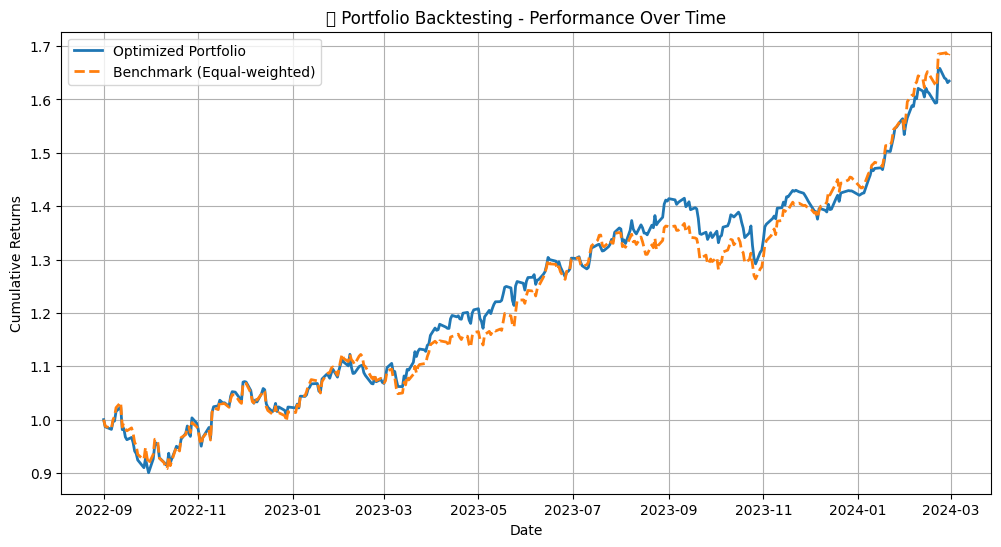


📊 **Backtesting Performance Metrics:**
                  Metric  Optimized Portfolio
0      Annualized Return             0.391140
1  Annualized Volatility             0.171982
2           Sharpe Ratio             2.274302

✅ **Annualized Return:** 39.11%
✅ **Annualized Volatility:** 17.20%
✅ **Sharpe Ratio:** 2.27


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

uploaded = files.upload()
csv_filename = list(uploaded.keys())[0]
stock_prices = pd.read_csv(csv_filename, parse_dates=["Date"])

# Pivot the stock prices dataframe
stock_prices = stock_prices.pivot(index="Date", columns="Ticker", values="Close").dropna()

# Normalize prices to start at 1 (for comparison)
normalized_prices = stock_prices / stock_prices.iloc[0]

optimized_weights = optimized_result.x  # Fetch the optimized weights
selected_stocks = portfolio_summary["Stock"].values  # Stocks chosen by AI

normalized_prices = normalized_prices[selected_stocks]

portfolio_returns = (normalized_prices * optimized_weights).sum(axis=1)

equal_weighted_returns = normalized_prices.mean(axis=1)

portfolio_cumulative_returns = (1 + portfolio_returns.pct_change().fillna(0)).cumprod()
benchmark_cumulative_returns = (1 + equal_weighted_returns.pct_change().fillna(0)).cumprod()

total_days = len(portfolio_cumulative_returns)
annualized_return = (portfolio_cumulative_returns[-1]) ** (252 / total_days) - 1
annualized_volatility = portfolio_returns.pct_change().std() * np.sqrt(252)

# Sharpe Ratio Calculation (Risk-Free Rate assumed as 0%)
sharpe_ratio = annualized_return / annualized_volatility

plt.figure(figsize=(12, 6))
plt.plot(portfolio_cumulative_returns, label="Optimized Portfolio", linewidth=2)
plt.plot(benchmark_cumulative_returns, label="Benchmark (Equal-weighted)", linestyle="dashed", linewidth=2)
plt.title("Portfolio Backtesting - Performance Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.legend()
plt.grid(True)
plt.show()
backtesting_results = pd.DataFrame({
    "Metric": ["Annualized Return", "Annualized Volatility", "Sharpe Ratio"],
    "Optimized Portfolio": [annualized_return, annualized_volatility, sharpe_ratio]
})

print("\n **Backtesting Performance Metrics:**")
print(backtesting_results)

# Print final metrics
print(f"\n **Annualized Return:** {annualized_return:.2%}")
print(f"**Annualized Volatility:** {annualized_volatility:.2%}")
print(f"**Sharpe Ratio:** {sharpe_ratio:.2f}")
